In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve

In [2]:
# Newton method in n dimensions implementation
def newton_method_nd(f,Jf,x0,tol,nmax,verb=False):

    # Initialize arrays and function value
    xn = x0; #initial guess
    rn = x0; #list of iterates
    Fn = f(xn); #function value vector
    n=0;
    nf=1; nJ=0; #function and Jacobian evals
    npn=1;

    if verb:
        print("|--n--|----xn----|---|f(xn)|---|");

    while npn>tol and n<=nmax:
        # compute n x n Jacobian matrix
        Jn = Jf(xn);
        nJ+=1;

        if verb:
            print("|--%d--|%1.7f|%1.12f|" %(n,np.linalg.norm(xn),np.linalg.norm(Fn)));

        # Newton step (we could check whether Jn is close to singular here)
        pn = -np.linalg.solve(Jn,Fn);
        xn = xn + pn;
        npn = np.linalg.norm(pn); #size of Newton step

        n+=1;
        rn = np.vstack((rn,xn));
        Fn = f(xn);
        nf+=1;

    r=xn;

    if verb:
        if np.linalg.norm(Fn)>tol:
            print("Newton method failed to converge, n=%d, |F(xn)|=%1.1e\n" % (nmax,np.linalg.norm(Fn)));
        else:
            print("Newton method converged, n=%d, |F(xn)|=%1.1e\n" % (n,np.linalg.norm(Fn)));

    return (r,rn,nf,nJ);


In [27]:
# Newton method in n dimensions implementation
def shaminski_method_nd(f,Jf,x0,tol,nmax,J_recalc, verb=False):

    # Initialize arrays and function value
    xn = x0; #initial guess
    rn = x0; #list of iterates
    Fn = f(xn); #function value vector
    n=0;
    nf=1; nJ=0; #function and Jacobian evals
    npn=1;

    if verb:
        print("|--n--|----xn----|---|f(xn)|---|");

    while npn>tol and n<=nmax:
        # compute n x n Jacobian matrix
        if(n%J_recalc == 0):
            Jn = Jf(xn);
            nJ+=1;

        if verb:
            print("|--%d--|%1.7f|%1.12f|" %(n,np.linalg.norm(xn),np.linalg.norm(Fn)));

        # Newton step (we could check whether Jn is close to singular here)
        pn = -np.linalg.solve(Jn,Fn);
        xn = xn + pn;
        npn = np.linalg.norm(pn); #size of Newton step

        n+=1;
        rn = np.vstack((rn,xn));
        Fn = f(xn);
        nf+=1;

    r=xn;

    if verb:
        if np.linalg.norm(Fn)>tol:
            print("Newton method failed to converge, n=%d, |F(xn)|=%1.1e\n" % (nmax,np.linalg.norm(Fn)));
        else:
            print("Newton method converged, n=%d, |F(xn)|=%1.1e\n" % (n,np.linalg.norm(Fn)));

    return (r,rn,nf,nJ);


In [74]:
def BK_solve(U, V, b, LU_piv):
    x = lu_solve(LU_piv, b)
    x = x + U@(V.T@b)
    return x

In [134]:
# Newton method in n dimensions implementation
def broyden_method_nd(f,B0,x0,tol,nmax, verb=False):

    # Initialize arrays and function value
    (LU_decomp, PIV_decmop) = lu_factor(B0)

    Fx0 = f(x0)
    pn = -lu_solve((LU_decomp, PIV_decmop), Fx0)
    x1 = x0 + pn

    Bn = B0

    vn = pn
    un = (1/np.dot(vn,pn))*vn

    Vn = np.reshape(vn, [len(vn),1])
    Un = np.reshape(un, [len(un),1])

    xn = x1
    Fn = f(x1)
    rn = np.vstack((x0,x1))
    

    n=1;
    nf=1; nJ=0; #function and Jacobian evals
    npn=1;

    if verb:
        print("|--n--|----xn----|---|f(xn)|---|");

    while npn>tol and n<=nmax:

        delta_x = (rn[n,:] - rn[n-1,:]
        vn = delta_x
        un = (1/np.dot(vn,delta_x))*vn

        Vn = np.hstack((Vn,np.reshape(vn, [len(vn),1])))
        Un = np.hstack((Un,np.reshape(un, [len(un),1])))

        Bn += np.outer(un,vn)
        print(xn)


        pn = -BK_solve(Un,Vn,f(rn[n,:])-f(rn[n-1,:]), (LU_decomp, PIV_decmop))
        nf += 1
        
        xn = xn + pn
        rn = np.vstack((rn,xn))

        if verb:
            print("|--%d--|%1.7f|%1.12f|" %(n,np.linalg.norm(xn),np.linalg.norm(Fn)));


        npn = np.linalg.norm(pn); #size of Newton step
        n+=1;


    r=xn;

    if verb:
        if np.linalg.norm(Fn)>tol:
            print("Newton method failed to converge, n=%d, |F(xn)|=%1.1e\n" % (nmax,np.linalg.norm(Fn)));
        else:
            print("Newton method converged, n=%d, |F(xn)|=%1.1e\n" % (n,np.linalg.norm(Fn)));

    return (r,rn,nf,nJ);

In [135]:
def func_1(xvec):
    (x,y) = xvec
    f = x**2 + y**2 - 4
    g = np.exp(x) + y -1
    return np.array([f,g])

def Jfunc_1(xvec):
    (x,y) = xvec
    j11 = 2*x
    j12 = 2*y
    j21 = np.exp(x)
    j22 = 1
    return np.array([[j11,j12],[j21,j22]])

|--n--|----xn----|---|f(xn)|---|
|--0--|1.4142136|3.374767562208|
|--1--|4.3235744|15.098904604329|
|--2--|4.3575159|15.000284319295|
|--3--|2.6377492|2.957999146036|
|--4--|2.0806894|0.329694275922|
|--5--|2.0015721|0.006305188305|
|--6--|2.0000006|0.000002475032|
|--7--|2.0000000|0.000000000000|
Newton method converged, n=8, |F(xn)|=0.0e+00



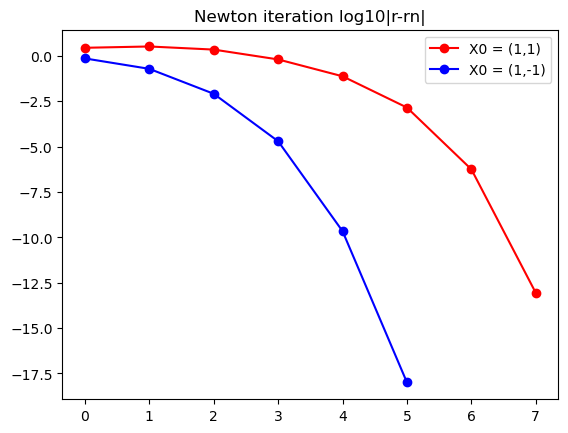

In [139]:
def driver1_newton():
    # Rootfinding example start. You are given F(x)=0.

    #First, we define F(x) and its Jacobian.

    # Apply Newton Method:
    tol=1e-13; nmax=500;
    
    x0_1 = np.array([1,1]);
    x0_2 = np.array([1,-1]);
    x0_3 = np.array([0,0]);
    
    (rN1,rnN1,nfN1,npn_arr1) = newton_method_nd(func_1,Jfunc_1,x0_1,tol,nmax);
    (rN2,rnN2,nfN2,npn_arr2) = newton_method_nd(func_1,Jfunc_1,x0_2,tol,nmax);
    # (rN3,rnN3,nfN3,npn_arr3) = newton_method_nd(func_1,Jfunc_1,x0_3,tol,nmax);

    # Plots and comparisons
    numN = rnN1.shape[0];
    errN = np.max(np.abs(rnN1[0:(numN-1)]-rN1),1);
    plt.plot(np.arange(numN-1),np.log10(errN+1e-18),'r-o',label='X0 = (1,1)');

    numN = rnN2.shape[0];
    errN = np.max(np.abs(rnN2[0:(numN-1)]-rN2),1);
    plt.plot(np.arange(numN-1),np.log10(errN+1e-18),'b-o',label='X0 = (1,-1)');

    
    plt.title('Newton iteration log10|r-rn|');
    plt.legend();
    plt.show()

driver1_newton()

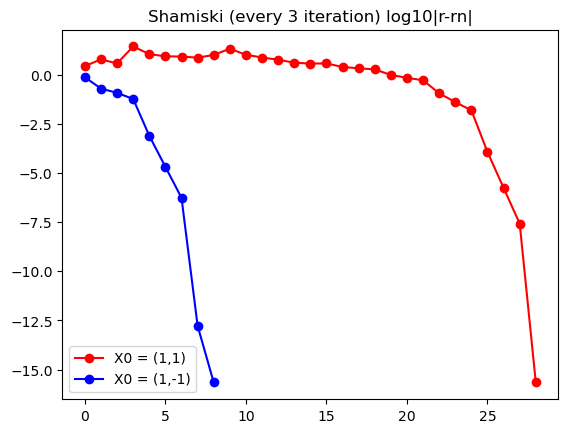

[ 1.00416874 -1.72963729]


In [137]:
def driver1_shaminski():
    # Rootfinding example start. You are given F(x)=0.

    #First, we define F(x) and its Jacobian.

    # Apply Newton Method:
    tol=1e-13; nmax=500;
    
    x0_1 = np.array([1,1]);
    x0_2 = np.array([1,-1]);
    x0_3 = np.array([0,0]);
    
    (rN1,rnN1,nfN1,npn_arr1) = shaminski_method_nd(func_1,Jfunc_1,x0_1,tol,nmax, 3);
    (rN2,rnN2,nfN2,npn_arr2) = shaminski_method_nd(func_1,Jfunc_1,x0_2,tol,nmax, 3);
    # (rN3,rnN3,nfN3,npn_arr3) = newton_method_nd(func_1,Jfunc_1,x0_3,tol,nmax);

    # Plots and comparisons
    numN = rnN1.shape[0];
    errN = np.max(np.abs(rnN1[0:(numN-1)]-rN1),1);
    plt.plot(np.arange(numN-1),np.log10(errN+1e-18),'r-o',label='X0 = (1,1)');

    numN = rnN2.shape[0];
    errN = np.max(np.abs(rnN2[0:(numN-1)]-rN2),1);
    plt.plot(np.arange(numN-1),np.log10(errN+1e-18),'b-o',label='X0 = (1,-1)');

    
    
    plt.title('Shamiski (every 3 iteration) log10|r-rn|');
    plt.legend();
    plt.show()

    print(rN1)

driver1_shaminski()

In [138]:
def driver1_broyden():
    # Rootfinding example start. You are given F(x)=0.

    #First, we define F(x) and its Jacobian.

    # Apply Newton Method:
    tol=1e-13; nmax=500;
    
    x0_1 = np.array([1,1]);
    x0_2 = np.array([1,-1]);
    x0_3 = np.array([0,0]);
    
    (rN1,rnN1,nfN1,npn_arr1) = broyden_method_nd(func_1,Jfunc_1(x0_1),x0_1,tol,nmax);
    plt.plot(rnN1[0:len(rnN1)-2,0] , rnN1[0:len(rnN1)-2,1])
    # (rN2,rnN2,nfN2,npn_arr2) = broyden_method_nd(func_1,Jfunc_1(x0_2),x0_2,tol,nmax);
    # (rN3,rnN3,nfN3,npn_arr3) = broyden_method_nd(func_1,np.identity(2),x0_3,tol,nmax);

    # # Plots and comparisons
    # numN = rnN1.shape[0];
    # errN = np.max(np.abs(rnN1[0:(numN-1)]-rN1),1);
    # plt.plot(np.arange(numN-1),np.log10(errN+1e-18),'r-o',label='X0 = (1,1)');

    # numN = rnN2.shape[0];
    # errN = np.max(np.abs(rnN2[0:(numN-1)]-rN2),1);
    # plt.plot(np.arange(numN-1),np.log10(errN+1e-18),'b-o',label='X0 = (1,-1)');

    
    # plt.title('Shamiski (every 3 iteration) log10|r-rn|');
    # plt.legend();
    # plt.show()

driver1_broyden()

[-1.16395341  4.16395341]
[-1.71440842 -1.33694167]
[ 0.02260427 10.72296214]
[-10.96194571 -78.29009185]
[ -415.43308311 -4016.1905583 ]
[ -1356986.64762763 -12835783.97779439]
[-1.57332727e+13 -1.48762752e+14]
[-2.36086297e+27 -2.23226559e+28]
[-5.87323438e+55 -5.55331637e+56]
[-3.97983181e+112 -3.76304838e+113]
[-inf -inf]


/tmp/ipykernel_4944/4032931661.py:3: RuntimeWarning: overflow encountered in matmul
  x = x + U@(V.T@b)
/tmp/ipykernel_4944/1762627625.py:46: RuntimeWarning: invalid value encountered in multiply
  un = (1/np.dot(vn,pn))*vn


ValueError: array must not contain infs or NaNs